In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

C:\Users\Franco\Anaconda2\lib\site-packages\ipykernel_launcher.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # Remove the CWD from sys.path while we load stuff.
C:\Users\Franco\Anaconda2\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()


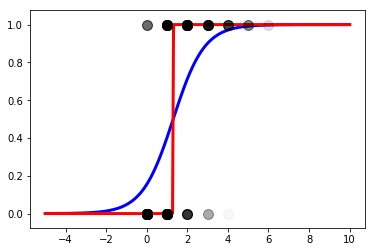

In [22]:
from sklearn.linear_model import LogisticRegression
data = pd.read_csv('files/ch06/SP1.csv')
s = data[['HomeTeam', 'AwayTeam', 'FTHG', 'FTAG', 'FTR']]

def my_f1(row):    
    return max(row['FTHG'], row['FTAG'])
def my_f2(row):
    return min(row['FTHG'], row['FTAG'])

s['W'] = s.apply(my_f1 , axis = 1)
s['L'] = s.apply(my_f2, axis=1)

x1 = s['W'].values
y1 = np.ones(len(x1), dtype = np.int)
x2 = s['L'].values
y2 = np.zeros(len(x2), dtype = np.int)

x = np.concatenate([x1, x2])
x = x[:, np.newaxis]
y = np.concatenate([y1, y2])

logreg = LogisticRegression()
logreg.fit(x, y)
X_test = np.linspace(-5, 10, 300)

def lr_model(x):
    return 1 / (1+np.exp(-x))

loss = lr_model(X_test*logreg.coef_ + logreg.intercept_).ravel()

X_test2 = X_test[:, np.newaxis]
losspred = logreg.predict(X_test2)

plt.scatter(x.ravel(), y, color = 'black', s = 100, zorder = 20, alpha = 0.03)
plt.plot(X_test, loss, color = 'blue', linewidth = 3)
plt.plot(X_test, losspred, color = 'red', linewidth = 3)